# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

## Goals of the Case Study

There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

## Proceeding with the Solution

In [99]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [100]:
# loading the dataset
df = pd.read_csv("Leads.csv")

In [101]:
# Looking at the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [102]:
# Checking the shape of the dataset
df.shape

(9240, 37)

In [103]:
#Check the edata type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### EDA

In [104]:
# Replacing 'Select' value with NaN
df = df.replace('Select',np.nan)

In [105]:
# Finding unique values in each column
df.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [106]:
# We can see that the Top five columns are having only one unique value. So they don't add any value to the analysis
#Let's go ahead and drop them

df = df.drop(['Get updates on DM Content', 'I agree to pay the amount through cheque','Receive More Updates About Our Courses','Magazine','Update me on Supply Chain Content'], axis=1)

In [107]:
# Also the 'Lead Number' and 'Prospect Id' won't make any difference to our analysis. So let's drop them as well.

df = df.drop(['Lead Number', 'Prospect ID'], axis=1)

In [108]:
# Now let's look at the NaN values in all columns with percentage

round(100*(df.isnull().sum()/len(df)), 2).sort_values()

Lead Origin                                       0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
Lead Source                                       0.39
Last Activity                                     1.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Country                                          26.63
What is yo

In [109]:
# Let's go ahead and drop the columns with nulls greater than 45%

df = df.dropna(thresh=len(df)*0.65, axis=1)

In [110]:
round(100*(df.isnull().sum()/len(df)), 2).sort_values()

Lead Origin                                       0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Source                                       0.39
Last Activity                                     1.11
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Country                                          26.63
What is yo

In [111]:
# There are lot of null values. So let's impute them with Mode and Median for particular values and others with Not-Provided
df['Lead Source'].fillna('Other', inplace=True)
df['What is your current occupation'].fillna('Undefined' , inplace=True)
df['What matters most to you in choosing a course'].fillna('Undefined' , inplace=True)
df['Country'].fillna('India' , inplace=True)
df['Last Activity'].fillna('Email Opened' , inplace=True)
df['Page Views Per Visit'].fillna(0.0 , inplace=True)
df['TotalVisits'].fillna(0.0, inplace=True)

In [112]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The Interview           0
Last Notable Activity          

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [114]:
# Identifying columns with data type

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [115]:
numeric_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [116]:
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

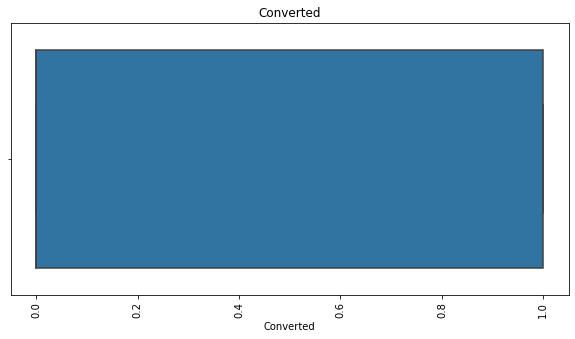

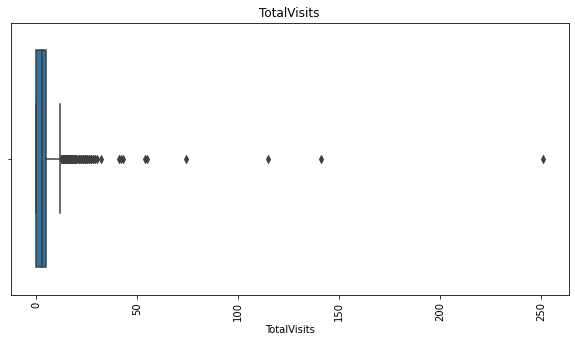

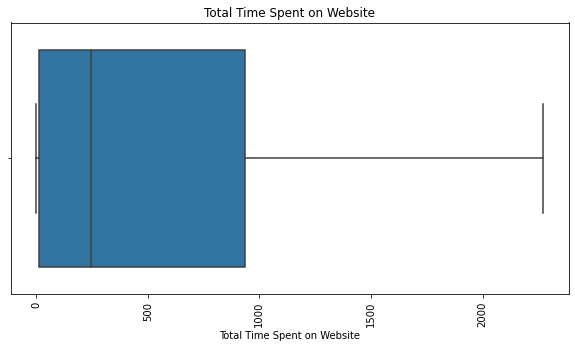

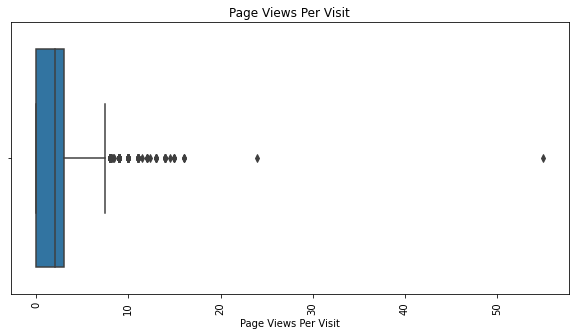

In [117]:
# Plotting the boxplot to check for Outliers

for column in numeric_cols:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(x=column, data=df, ax=ax)
    ax.set_title(column)
    plt.xticks(rotation=90)
    plt.show()

In [118]:
# We can see that Outliers exist in Total Visits and Page Views Per Visit Columns

# Lets trim them
df = df[df['Page Views Per Visit'] < df['Page Views Per Visit'].quantile(0.9)]
df = df[df['TotalVisits'] < df['TotalVisits'].quantile(0.9)]
df = df[df['Total Time Spent on Website'] < df['Total Time Spent on Website'].quantile(0.9)]

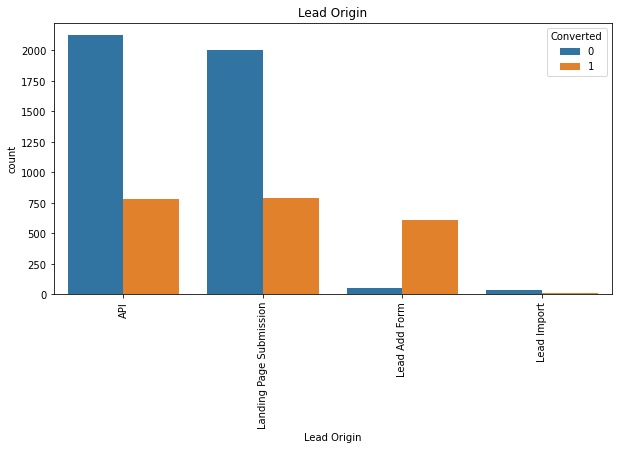

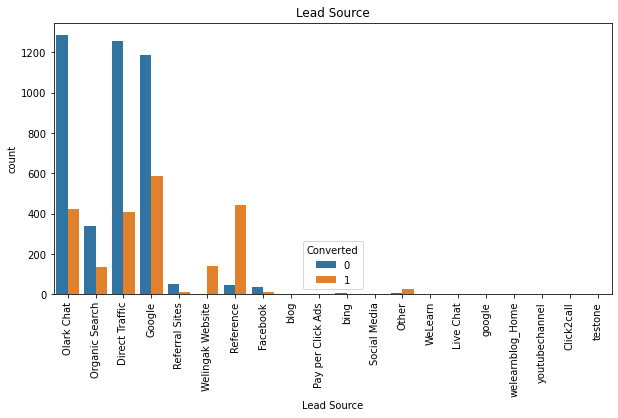

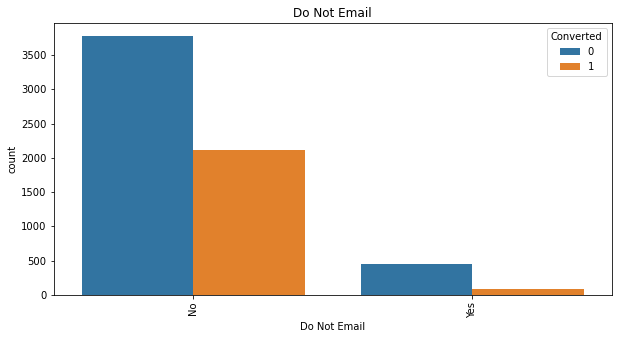

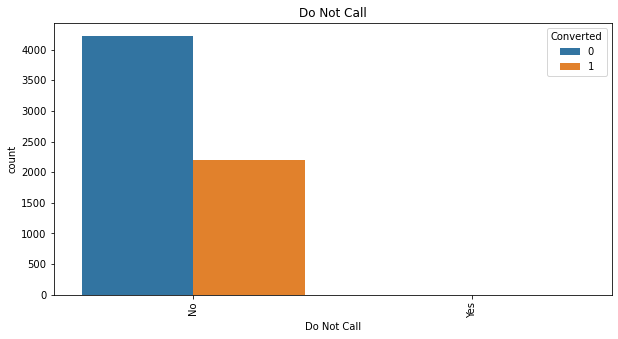

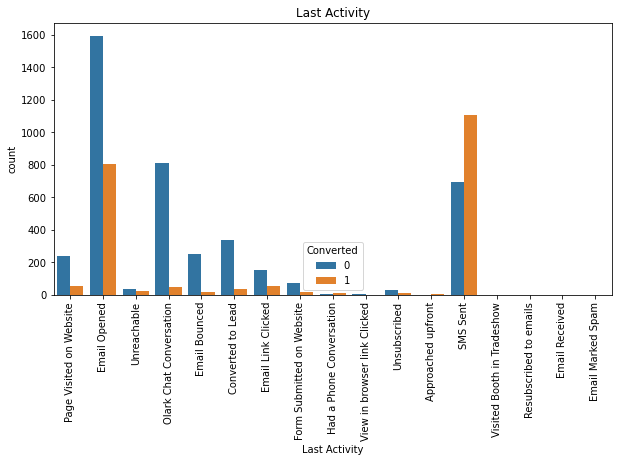

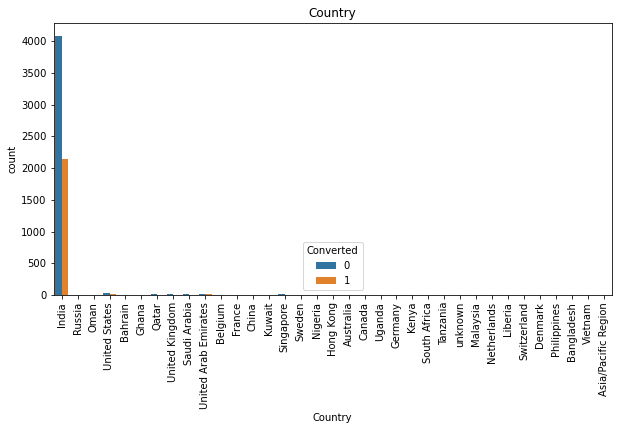

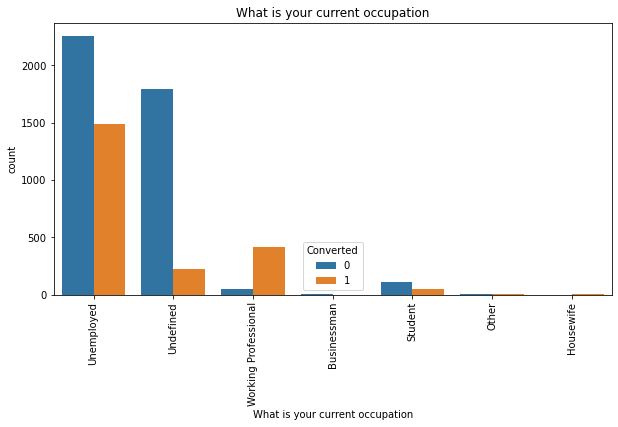

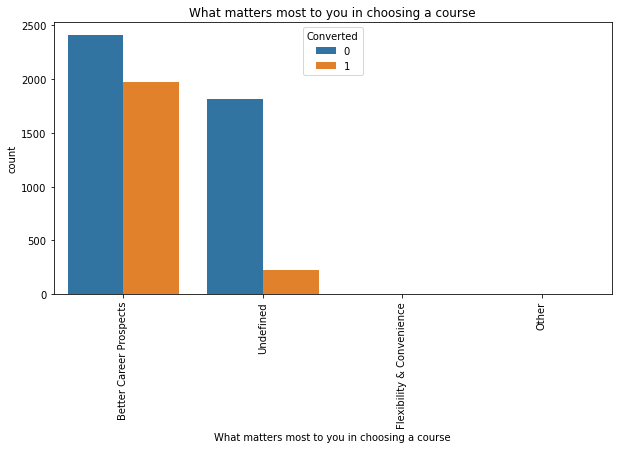

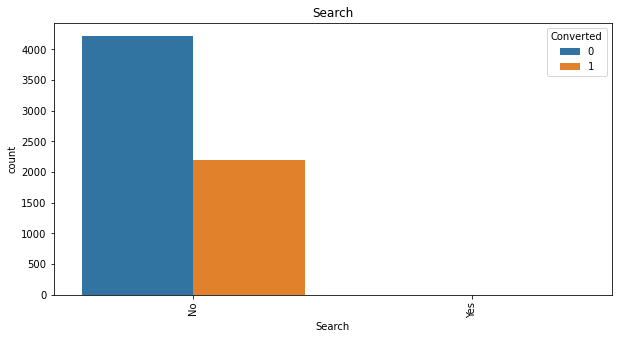

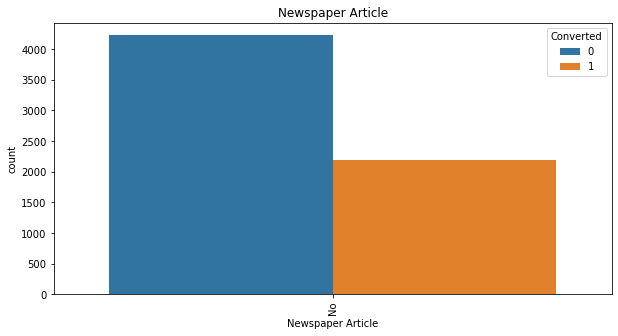

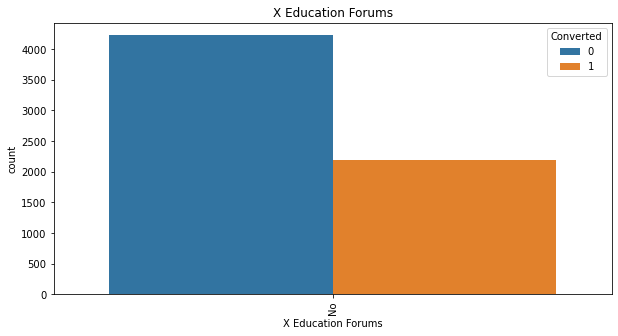

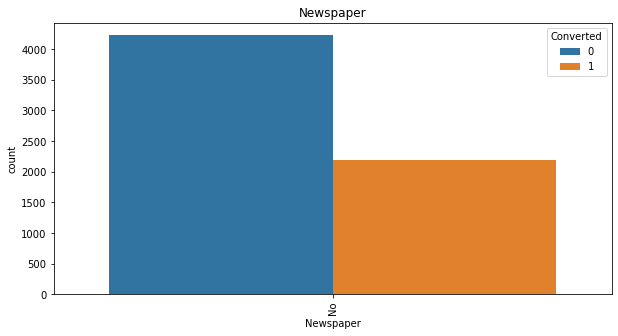

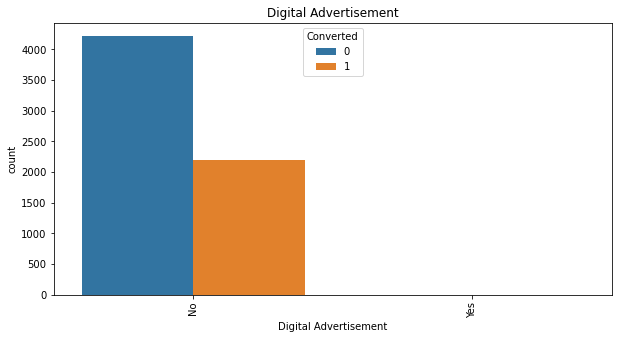

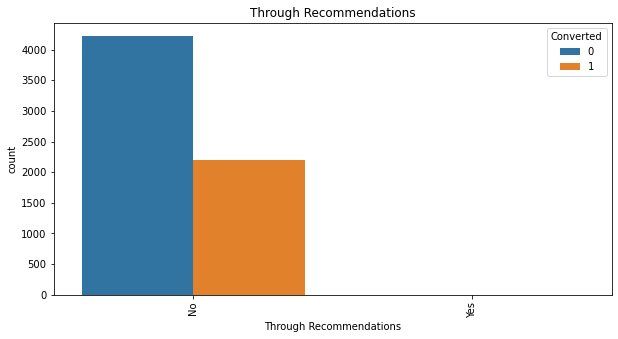

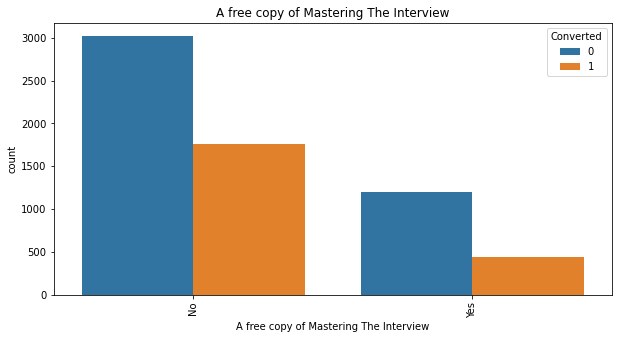

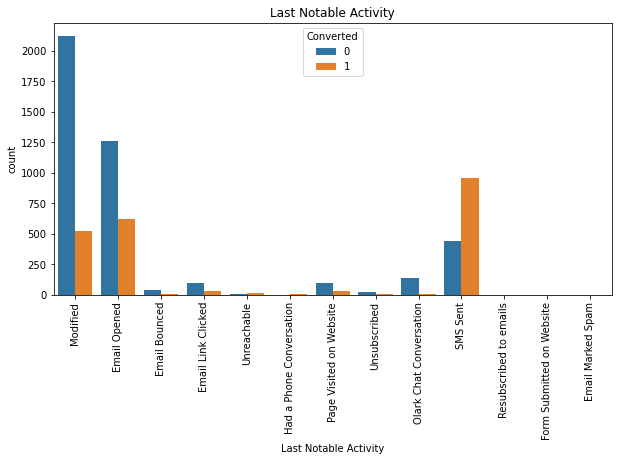

In [119]:
for column in categorical_cols:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=column, data=df, ax=ax, hue=df.Converted)
    ax.set_title(column)
    plt.xticks(rotation=90)
    plt.show()

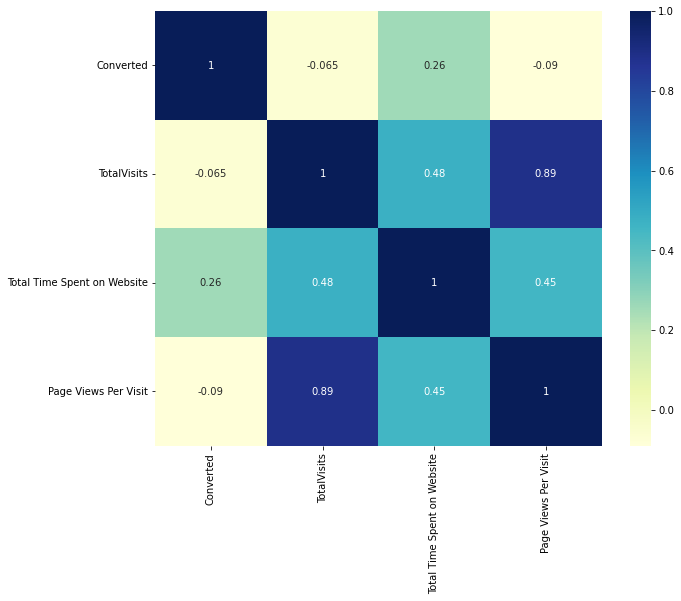

In [120]:
#Checking correlations of numeric values

plt.figure(figsize=(10,8))

#Heatmaps
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [121]:
# Finding unique values in each column
df.nunique().sort_values()

Newspaper                                           1
Newspaper Article                                   1
X Education Forums                                  1
Through Recommendations                             2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Digital Advertisement                               2
A free copy of Mastering The Interview              2
Search                                              2
Lead Origin                                         4
What matters most to you in choosing a course       4
TotalVisits                                         6
What is your current occupation                     7
Page Views Per Visit                               10
Last Notable Activity                              13
Last Activity                                      17
Lead Source                                        20
Country                     

In [122]:
# We can see that the Top 3 columns are having only one unique value. So they don't add any value to the analysis
#Let's go ahead and drop them

df = df.drop(['Newspaper', 'Newspaper Article','X Education Forums'], axis=1)

### Data Preparation

In [123]:
# Converting Binary Yes or No to 1 & 0
vars =  ['Do Not Email', 'Do Not Call', 'Search','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

In [124]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [125]:
# List of columns to create dummies
dummy_list = ['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Last Notable Activity','What matters most to you in choosing a course','Country']                                        

In [126]:
# Creating a dummy variables for the categorical cploumns and dropping the first one.
df_dummy = pd.get_dummies(df[dummy_list], drop_first=True)
df_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,...,Country_South Africa,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# Concatenating the dummy data to the original dataframe
df = pd.concat([df, df_dummy], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Country_South Africa,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,0,0,0,0,0,0,0
5,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,India,...,0,0,0,0,0,0,0,0,0,0
7,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,India,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Dropping the columns for which dummies were created
df = df.drop(dummy_list,axis=1)

In [129]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Country_South Africa,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Perfoming Train Test Split

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
# Defining X 
X = df.drop(['Converted'], axis=1)

# Defining target variable to y
y = df['Converted']

In [132]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [133]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Country_South Africa,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
2887,0,0,0.115280,-0.518269,0.347319,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8647,0,0,0.115280,1.952380,0.347319,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
527,0,0,-1.132246,-0.776884,-1.113272,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8776,0,0,-1.132246,-0.776884,-1.113272,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8264,0,0,-0.508483,-0.746754,-0.382976,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# Checking the Lead Conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

34.20601527193393

#### We have almost 35% lead conversion rate.

### Feature Selection

In [135]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model,n_features_to_select = 20)             
rfe = rfe.fit(X_train, y_train)

In [136]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'What matters most to you in choosing a course_Undefined',
       'Country_France', 'Country_Netherlands'],
      dtype='object')

### Model Building 

In [137]:
import statsmodels.api as sm

#### Model 1

In [138]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4491
Model:                            GLM   Df Residuals:                     4470
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1643.8
Date:                Sun, 26 Feb 2023   Deviance:                       3287.5
Time:                        18:29:11   Pearson chi2:                 4.41e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4224
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -1.3910      0.085    -16.428      0.000      -1.557      -1.225
Do Not Email                                               -0.9580      0.242     -3.951      0.000      -1.433      -0.483
Total Time Spent on Website                                 1.0283      0.051     20.184      0.000       0.928       1.128
Lead Origin_Lead Add Form                                   3.0904      0.515      6.006      0.000       2.082       4.099
Lead Source_Olark Chat                                      1.6604      0.126     13.205      0.000       1.414       1.907
Lead Source_Reference                                       0.7913      0.547      1.448      0.148      -0.280       1.862
Lead Source_Welingak Website                                3.3036      1.129      2.927      0.003       1.091       5.516
Last Activity_Email Bounced                                -1.0033      0.456     -2.202      0.028      -1.896      -0.110
Last Activity_Olark Chat Conversation                      -0.8809      0.227     -3.886      0.000      -1.325      -0.437
Last Activity_Resubscribed to emails                       24.4558   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                      1.3320      0.097     13.669      0.000       1.141       1.523
What is your current occupation_Housewife                  22.9283   1.62e+04      0.001      0.999   -3.17e+04    3.17e+04
What is your current occupation_Working Professional        2.2443      0.218     10.303      0.000       1.817       2.671
Last Notable Activity_Had a Phone Conversation              2.6707      1.315      2.031      0.042       0.093       5.248
Last Notable Activity_Modified                             -0.8007      0.106     -7.521      0.000      -1.009      -0.592
Last Notable Activity_Olark Chat Conversation              -1.2427      0.575     -2.163      0.031      -2.369      -0.117
Last Notable Activity_Page Visited on Website              -0.9007      0.361     -2.497      0.013      -1.608      -0.194
Last Notable Activity_Unreachable                           2.0920      0.738      2.834      0.005       0.645       3.539
What matters most to you in choosing a course_Undefined    -1.3602      0.113    -12.048      0.000      -1.581      -1.139
Country_France                                              2.0927      1.256      1.666      0.096      -0.370       4.555
Country_Netherlands                                       -25.1370   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
===========================================================================================================

In [139]:
# Lets drop columns with high P-Values

cols= cols.drop(['Lead Source_Reference','Last Activity_Resubscribed to emails','What is your current occupation_Housewife','Country_France','Country_Netherlands'])

#### Model 2 

In [140]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4491
Model:                            GLM   Df Residuals:                     4475
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1655.6
Date:                Sun, 26 Feb 2023   Deviance:                       3311.1
Time:                        18:29:11   Pearson chi2:                 4.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4194
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -1.3698      0.084    -16.292      0.000      -1.535      -1.205
Do Not Email                                               -0.9605      0.242     -3.973      0.000      -1.434      -0.487
Total Time Spent on Website                                 1.0179      0.051     20.093      0.000       0.919       1.117
Lead Origin_Lead Add Form                                   3.7789      0.206     18.305      0.000       3.374       4.184
Lead Source_Olark Chat                                      1.6441      0.125     13.137      0.000       1.399       1.889
Lead Source_Welingak Website                                2.5918      1.025      2.528      0.011       0.582       4.601
Last Activity_Email Bounced                                -1.0683      0.458     -2.332      0.020      -1.966      -0.170
Last Activity_Olark Chat Conversation                      -0.8971      0.226     -3.965      0.000      -1.341      -0.454
Last Activity_SMS Sent                                      1.3128      0.097     13.524      0.000       1.123       1.503
What is your current occupation_Working Professional        2.2396      0.217     10.307      0.000       1.814       2.665
Last Notable Activity_Had a Phone Conversation              2.6487      1.313      2.017      0.044       0.075       5.222
Last Notable Activity_Modified                             -0.7968      0.106     -7.525      0.000      -1.004      -0.589
Last Notable Activity_Olark Chat Conversation              -1.2365      0.574     -2.155      0.031      -2.361      -0.112
Last Notable Activity_Page Visited on Website              -0.9067      0.359     -2.524      0.012      -1.611      -0.203
Last Notable Activity_Unreachable                           2.0744      0.737      2.814      0.005       0.630       3.519
What matters most to you in choosing a course_Undefined    -1.3557      0.112    -12.064      0.000      -1.576      -1.135
===========================================================================================================================
"""

#### VIF Values

In [141]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Bounced,2.09
0,Do Not Email,2.08
6,Last Activity_Olark Chat Conversation,2.07
3,Lead Source_Olark Chat,1.87
10,Last Notable Activity_Modified,1.85
2,Lead Origin_Lead Add Form,1.63
14,What matters most to you in choosing a course_...,1.51
4,Lead Source_Welingak Website,1.32
11,Last Notable Activity_Olark Chat Conversation,1.32
7,Last Activity_SMS Sent,1.30


#### All  VIF values are below 5

#### Making predicions

In [142]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2887    0.200788
8647    0.649640
527     0.027488
8776    0.694570
8264    0.013621
5887    0.009175
4664    0.373678
4765    0.362930
4312    0.228773
9164    0.580330
dtype: float64

In [143]:
# Reshaping into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20078846, 0.64964017, 0.02748808, 0.69457026, 0.01362119,
       0.00917548, 0.3736782 , 0.3629296 , 0.22877266, 0.58032976])

In [144]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.200788,2887
1,0,0.649640,8647
2,0,0.027488,527
3,1,0.694570,8776
4,0,0.013621,8264


In [145]:
# Lets's define a arbitrary cut-off of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.200788,2887,0
1,0,0.649640,8647,1
2,0,0.027488,527,0
3,1,0.694570,8776,1
4,0,0.013621,8264,0


In [146]:
# Plotting the confusion Matrix
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2712  256]
 [ 495 1028]]


In [147]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        2712      256
# converted            495       1028  

In [148]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8327766644399911


In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6749835850295469


In [151]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.9137466307277629


In [152]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.0862533692722372


In [153]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.8006230529595015


We can see that our Specificity is 0.91 which is good but we need to improve our Sensitivity which is 0.67

#### Plotting the ROC-Curve

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

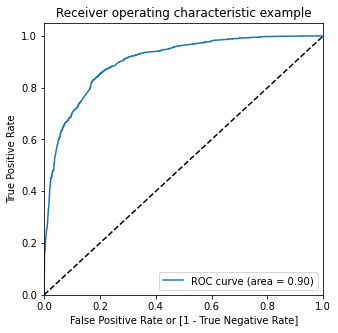

In [156]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


#### Finding the optimal cut-off point

In [157]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.200788,2887,0,1,1,1,0,0,0,0,0,0,0
1,0,0.649640,8647,1,1,1,1,1,1,1,1,0,0,0
2,0,0.027488,527,0,1,0,0,0,0,0,0,0,0,0
3,1,0.694570,8776,1,1,1,1,1,1,1,1,0,0,0
4,0,0.013621,8264,0,1,0,0,0,0,0,0,0,0,0


In [158]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.339123  1.000000  0.000000
0.1   0.1  0.664885  0.962574  0.512129
0.2   0.2  0.783122  0.904137  0.721024
0.3   0.3  0.817858  0.854235  0.799191
0.4   0.4  0.828323  0.732764  0.877358
0.5   0.5  0.832777  0.674984  0.913747
0.6   0.6  0.833667  0.622456  0.942049
0.7   0.7  0.808506  0.504268  0.964623
0.8   0.8  0.794478  0.439265  0.976752
0.9   0.9  0.750612  0.288903  0.987534


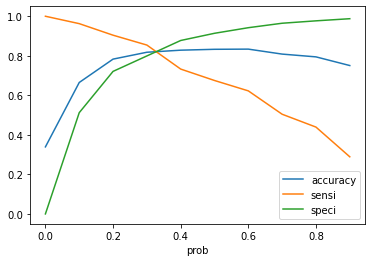

In [159]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.200788,2887,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.649640,8647,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.027488,527,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.694570,8776,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.013621,8264,0,1,0,0,0,0,0,0,0,0,0,0


In [161]:
# Assigning Lead Score to Training Data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.200788,2887,0,1,1,1,0,0,0,0,0,0,0,0,20
1,0,0.649640,8647,1,1,1,1,1,1,1,1,0,0,0,1,65
2,0,0.027488,527,0,1,0,0,0,0,0,0,0,0,0,0,3
3,1,0.694570,8776,1,1,1,1,1,1,1,1,0,0,0,1,69
4,0,0.013621,8264,0,1,0,0,0,0,0,0,0,0,0,0,1


### Model Evaluation

In [162]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8238699621465152


In [163]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2431,  537],
       [ 254, 1269]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8332239001969797


In [166]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8190700808625337


In [167]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.1809299191374663


In [168]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7026578073089701


In [169]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.8006230529595015


In [170]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6749835850295469


### Precision - Recall Tradeoff

In [171]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4486    0
 4487    1
 4488    0
 4489    0
 4490    0
 Name: Converted, Length: 4491, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 4486    0
 4487    1
 4488    1
 4489    0
 4490    1
 Name: predicted, Length: 4491, dtype: int64)

In [172]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

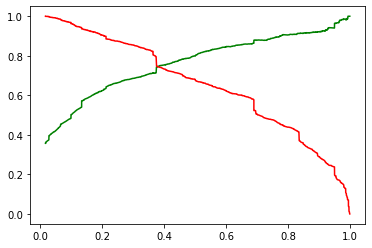

In [173]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making Predictions on Test Set

In [174]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [175]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,What matters most to you in choosing a course_Undefined
3343,0,-0.776884,0,1,0,0,0,0,0,0,0,0,0,0,0
6057,0,-0.776884,0,1,0,0,1,0,0,0,0,1,0,0,1
7437,0,-0.776884,0,1,0,0,1,0,0,0,1,0,0,0,1
2464,0,1.934805,0,0,0,0,0,1,0,0,1,0,0,0,1
7678,0,-0.776884,0,1,0,0,0,0,0,0,0,0,0,0,1


In [176]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3343    0.373678
6057    0.017884
7437    0.027488
2464    0.440240
7678    0.133289
8961    0.363681
8181    0.949364
3968    0.010316
9089    0.204855
5864    0.010701
dtype: float64

In [177]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head
y_pred_1.head()

,0
3343,0.373678
6057,0.017884
7437,0.027488
2464,0.440240
7678,0.133289


In [179]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,3343,0.373678
1,0,6057,0.017884
2,0,7437,0.027488
3,1,2464,0.440240
4,0,7678,0.133289


In [184]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [185]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [186]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3343,1,0.373678
1,6057,0,0.017884
2,7437,0,0.027488
3,2464,1,0.440240
4,7678,0,0.133289


In [187]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [188]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3343,1,0.373678,1
1,6057,0,0.017884,0
2,7437,0,0.027488,0
3,2464,1,0.440240,1
4,7678,0,0.133289,0


In [189]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8276220145379024


In [190]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1028,  226],
       [ 106,  566]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8422619047619048


In [193]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8197767145135566


In [194]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3343,1,0.373678,1,37
1,6057,0,0.017884,0,2
2,7437,0,0.027488,0,3
3,2464,1,0.440240,1,44
4,7678,0,0.133289,0,13


#### Finding Hot Leads

In [195]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
6,8181,0,0.949364,1,95
10,7814,1,0.979378,1,98
24,7033,1,0.989672,1,99
26,3761,1,0.985374,1,99
38,1368,1,0.971223,1,97
...,...,...,...,...,...
1877,8077,1,0.994352,1,99
1888,3498,1,0.985374,1,99
1889,8790,1,0.952927,1,95
1907,4775,1,0.994352,1,99


In [196]:
#### Finding important features of our model

res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                                  3.778942
Last Notable Activity_Had a Phone Conversation             2.648737
Lead Source_Welingak Website                               2.591839
What is your current occupation_Working Professional       2.239595
Last Notable Activity_Unreachable                          2.074371
Lead Source_Olark Chat                                     1.644099
Last Activity_SMS Sent                                     1.312759
Total Time Spent on Website                                1.017866
Last Notable Activity_Modified                            -0.796800
Last Activity_Olark Chat Conversation                     -0.897147
Last Notable Activity_Page Visited on Website             -0.906671
Do Not Email                                              -0.960500
Last Activity_Email Bounced                               -1.068260
Last Notable Activity_Olark Chat Conversation             -1.236485
What matters most to you in choosing a course_Un